# Custom Models in pycalphad

M.E. Trybula, T. Gancarz, W. Gąsior, Density, surface tension and viscosity of liquid binary Al-Zn and ternary Al-Li-Zn alloys, Fluid Phase Equilibria, Volume 421, 2016, Pages 39-48, ISSN 0378-3812, http://dx.doi.org/10.1016/j.fluid.2016.03.013.
(http://www.sciencedirect.com/science/article/pii/S0378381216301418)

Władysław Gąsior, "Viscosity modeling of binary alloys: Comparative studies",
        Calphad, Volume 44, 2014, Pages 119-128, ISSN 0364-5916,
        http://dx.doi.org/10.1016/j.calphad.2013.10.007.
        
Chenyang Zhou, Cuiping Guo, Changrong Li, Zhenmin Du, "Thermodynamic assessment of the phase equilibria and prediction of glass-forming ability of the Al–Cu–Zr system," Journal of Non-Crystalline Solids, Volume 461, 2017,
Pages 47-60,
https://doi.org/10.1016/j.jnoncrysol.2016.09.031.
(http://www.sciencedirect.com/science/article/pii/S0022309316304161)

## Background

We are going to take a CALPHAD-based property model from the literature and use it to predict the viscosity of Al-Cu-Zr liquids.

For a binary alloy liquid under small undercooling, Gąsior suggested an entropy model of the form
$$\eta = (\sum_i x_i \eta_i ) (1 - 2\frac{S_{ex}}{R})$$

where $\eta_i$ is the viscosity of the element $i$, $x_i$ is the mole fraction, $S_{ex}$ is the excess entropy, and $R$ is the gas constant.

In [1]:
from pycalphad import Database

We can calculate the excess entropy of the liquid using the Al-Cu-Zr thermodynamic database from Zhou et al.

We add three new parameters to describe the viscosity (in Pa-s) of the pure elements Al, Cu, and Zr:
```
   $ Viscosity test parameters
   PARAMETER ETA(LIQUID,AL;0) 2.98150E+02  +0.000281*EXP(12300/(8.3145*T));   6.00000E+03   
  N REF:0 !
   PARAMETER ETA(LIQUID,CU;0) 2.98150E+02  +0.000657*EXP(21500/(8.3145*T));   6.00000E+03   
  N REF:0 !
  PARAMETER ETA(LIQUID,ZR;0) 2.98150E+02  +4.74E-3 - 4.97E-6*(T-2128) ;   6.00000E+03   
    N REF:0 !
```

Great! However, if we try to load the database now, we will get an error:

In [2]:
dbf = Database('databases/alcuzr-viscosity.tdb')

Failed while parsing:     PARAMETER ETA(LIQUID,AL;0) 2.98150E+02 +0.000281*EXP(12300/(8.3145*T)); 6.00000E+03 N REF:0 
Tokens: None


ParseException: Expected {{"ELEMENT" W:(ABCD...) W:(ABCD...) Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)') Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)') Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)') LineEnd} | {"SPECIES" W:(ABCD...) [Suppress:("%")] Group:({{W:(ABCD...) [Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)')]}}...) [{Suppress:("/") W:(+-01...)}] LineEnd} | {"TYPE_DEFINITION" Suppress:(<SP><TAB><CR><LF>) !W:( !) SkipTo:(LineEnd)} | {"FUNCTION" W:(ABCD...) {{Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)') | [","]...} {{SkipTo:(";") Suppress:(";") [Suppress:(",")]... [Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)')] Suppress:({W:(YNyn) | <SP><TAB><CR><LF>})}}...}} | {"ASSESSED_SYSTEMS" SkipTo:(LineEnd)} | {"DEFINE_SYSTEM_DEFAULT" SkipTo:(LineEnd)} | {"DEFAULT_COMMAND" SkipTo:(LineEnd)} | {"DATABASE_INFO" SkipTo:(LineEnd)} | {"VERSION_DATE" SkipTo:(LineEnd)} | {"REFERENCE_FILE" SkipTo:(LineEnd)} | {"ADD_REFERENCES" SkipTo:(LineEnd)} | {"LIST_OF_REFERENCES" SkipTo:(LineEnd)} | {"TEMPERATURE_LIMITS" SkipTo:(LineEnd)} | {"PHASE" W:(ABCD...) Suppress:(<SP><TAB><CR><LF>) !W:( !) Suppress:(<SP><TAB><CR><LF>) Suppress:(W:(0123...)) Group:({Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)')}...) Suppress:(SkipTo:(LineEnd))} | {"CONSTITUENT" W:(ABCD...) Suppress:(<SP><TAB><CR><LF>) Suppress:(":") Group:(Group:({{[Suppress:(",")] {W:(ABCD...) [Suppress:("%")]}}}...) [: Group:({{[Suppress:(",")] {W:(ABCD...) [Suppress:("%")]}}}...)]...) Suppress:(":") LineEnd} | {"PARAMETER" {"BMAGN" | "DF" | "DQ" | "G" | "GD" | "L" | "MF" | "MQ" | "NT" | "TC" | "THETA" | "V0" | "VS"} Suppress:("(") W:(ABCD...) [{Suppress:("&") W:(ABCD...)}] Suppress:(",") Group:(Group:({{[Suppress:(",")] {W:(ABCD...) [Suppress:("%")]}}}...) [: Group:({{[Suppress:(",")] {W:(ABCD...) [Suppress:("%")]}}}...)]...) [{Suppress:(";") W:(0123...)}] Suppress:(")") {{Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)') | [","]...} {{SkipTo:(";") Suppress:(";") [Suppress:(",")]... [Re:('[-+]?([0-9]+\\.(?!([0-9]|[eE])))|([0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?)')] Suppress:({W:(YNyn) | <SP><TAB><CR><LF>})}}...}}}, found '('  (at char 17), (line:1, col:18)

This is because "ETA" parameters are not supported by default in pycalphad, so we need to tell pycalphad's TDB parser that "ETA" should be on the list of supported parameter types:

In [3]:
import pycalphad.io.tdb_keywords
pycalphad.io.tdb_keywords.TDB_PARAM_TYPES.append('ETA')

Now the database will load:

In [4]:
dbf = Database('databases/alcuzr-viscosity.tdb')

## Writing the Custom Model

Now that we have our "ETA" parameters in the database, we need to write a `Model` class to tell pycalphad how to compute viscosity. All custom models are subclasses of the pycalphad `Model` class. A rough draft of our custom model is shown below.

In [5]:
# Useful imports for custom models
from tinydb import where
import sympy
from pycalphad import Model

class ViscosityModel(Model):
    def build_phase(self, dbe):
        # build_phase is a special function which will be called by pycalphad
        # dbe is our Database object
        # First build all the default models
        super(ViscosityModel, self).build_phase(dbe)
        # Now construct our custom viscosity property
        self.viscosity = self.build_viscosity(dbe)

    def build_viscosity(self, dbe):
        raise NotImplementedError('What do I write here?!')

Now we need to write the implementation of `build_viscosity`. The function needs to do four things:
1. Query the Database for all the "ETA" parameters
2. Compute their weighted sum
3. Compute the excess entropy of the liquid
4. Plug all the values into the Gąsior equation and return the result

In [6]:
from tinydb import where
import sympy
from pycalphad import Model, variables as v

class ViscosityModel(Model):
    def build_phase(self, dbe):
        super(ViscosityModel, self).build_phase(dbe)
        self.viscosity = self.build_viscosity(dbe)

    def build_viscosity(self, dbe):
        if self.phase_name != 'LIQUID':
            raise ValueError('Viscosity is only defined for LIQUID phase')
        phase = dbe.phases[self.phase_name]
        param_search = dbe.search
        # STEP 1
        eta_param_query = (
            (where('phase_name') == phase.name) & \
            (where('parameter_type') == 'ETA') & \
            (where('constituent_array').test(self._array_validity))
        )
        # STEP 2
        eta = self.redlich_kister_sum(phase, param_search, eta_param_query)
        # STEP 3
        excess_energy = self.GM - self.models['ref'] - self.models['idmix']
        #liquid_mod = Model(dbe, self.components, self.phase_name)
        ## we only want the excess contributions to the entropy
        #del liquid_mod.models['ref']
        #del liquid_mod.models['idmix']
        excess_entropy = -excess_energy.diff(v.T)
        ks = 2
        # STEP 4
        result = eta * (1 - ks * excess_entropy / v.R)
        self.eta = eta
        return result

## Putting it all together

Now we can create an instance of `ViscosityModel` for the liquid phase using the `Database` object we created earlier.

In [7]:
mod = ViscosityModel(dbf, ['CU', 'ZR'], 'LIQUID')

Finally we plot the result.

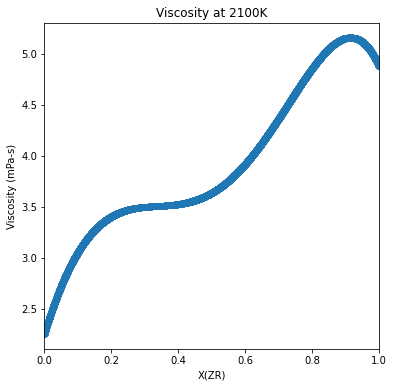

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import calculate

mod = ViscosityModel(dbf, ['CU', 'ZR'], 'LIQUID')

temp = 2100
res = calculate(dbf, ['CU', 'ZR'], 'LIQUID', P=101325, T=temp,
                model=mod, output='viscosity') # NOTICE: model=mod to tell pycalphad about our model

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(res.X.sel(component='ZR'), 1000 * res.viscosity.values)
ax.set_xlabel('X(ZR)')
ax.set_ylabel('Viscosity (mPa-s)')
ax.set_xlim((0,1))
ax.set_title('Viscosity at {}K'.format(temp));

We repeat the calculation for Al-Cu.

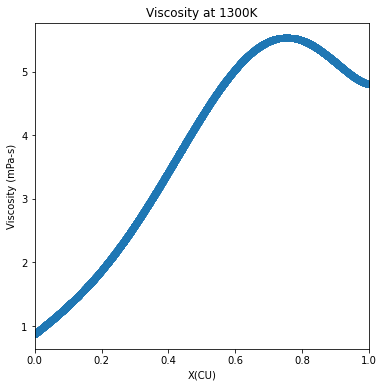

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import calculate

mod = ViscosityModel(dbf, ['CU', 'AL'], 'LIQUID')


temp = 1300
res = calculate(dbf, ['CU', 'AL'], 'LIQUID', P=101325, T=temp,
                model=mod, output='viscosity')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.scatter(res.X.sel(component='CU'), 1000 * res.viscosity.values)
ax.set_xlabel('X(CU)')
ax.set_ylabel('Viscosity (mPa-s)')
ax.set_xlim((0,1))
ax.set_title('Viscosity at {}K'.format(temp));